In [24]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


In [4]:
#chargement des bases de données 
mp= sns.load_dataset("iris")
mp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#Afficher les observations de species
mp['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
#
var= mp[[ 'petal_length','petal_width']]
var

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
#suppression d'une observation
mp= mp[mp['species']!= "virginica"]
mp['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [15]:
# x et y
x= mp['petal_length']
y= mp['petal_width']

In [37]:
#Encodage
X= mp[[ 'petal_length','petal_width']].values
Y= mp['species'].map({"setosa":0,"versicolor":1}).values

In [38]:
#train
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
#
modele_svm=SVC(kernel='rbf',C=1,gamma='scale')
modele_svm.fit(X_train,Y_train)

SVC(C=1)

In [40]:
#
y_prediction= modele_svm.predict(X_test)
accuracy= accuracy_score(Y_test,y_prediction)
accuracy

1.0

In [41]:
#
rapport= classification_report(Y_test,y_prediction)
print(rapport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



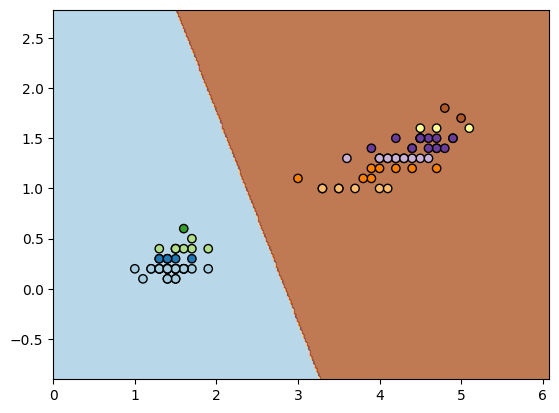

In [42]:
#Visualisation
x_min,x_max= X[:,0].min()-1,X[:,0].max()+1
y_min,y_max= X[:,1].min()-1,X[:,1].max()+1
xx,yy= np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z= modele_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z= Z.reshape(xx.shape)

plt.contourf(xx,yy,Z, alpha= 0.8, cmap=plt.cm.Paired)
plt.scatter(X[:,0], X[:,1], edgecolors='k', marker='o', cmap = plt.cm.Paired,c=y)
plt.show()